 **the main librarirs**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**load dataset of bankLoans**

In [2]:
df=pd.read_csv('/content/data_train.csv')
print(df.shape)
df.head()

(307511, 33)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,Laborers,1.0,2,2,WEDNESDAY,10,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,Core staff,2.0,1,1,MONDAY,11,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,Laborers,1.0,2,2,MONDAY,9,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,Laborers,2.0,2,2,WEDNESDAY,17,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,Core staff,1.0,2,2,THURSDAY,11,0,Religion,0.322738


**represent distribution dataset to** :

             know if data are balanced or not.

 -  if it is balanced ,then we will work on data without any editing , `but` it was imbalanced,then we will compute smote for these data `or` over_sampling to increase no of cols that  with small values `or` under_sampling to decrease from large cols values.



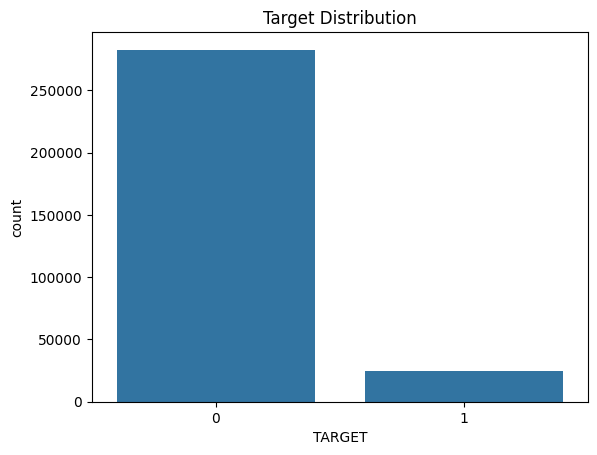

In [3]:
sns.countplot(x='TARGET',data=df)
plt.title('Target Distribution')
plt.show()

**Here we see null values in data , we found:**

1. cols need to remove them like `OCCUPATION_TYPE`; because the shape of it `31%` that is more than `20%` ,so we will remove cols.

2. rows need to remove ;because they are `> .1%` like `CNT_FAM_MEMBERS`,`AMT_ANNUITY`.

3. if shape ,for example like us `.21%` we will calculate whether mean or median because it numeric not object ,we did that histogram to determine ,we found that distribution unnormally `left skwed` so we calculate for it the`median`.


* then we calculated the shape before `(307511, 33)` & after `(305548, 31)`.

In [4]:
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({'null':null,'ratio':ratio}).T

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,...,0.0,96391.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,660.000000
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000039,...,0.0,0.313455,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,0.002146


In [5]:
df.drop(['OCCUPATION_TYPE','SK_ID_CURR'],axis=1,inplace=True)

In [6]:
df.dropna(inplace=True)

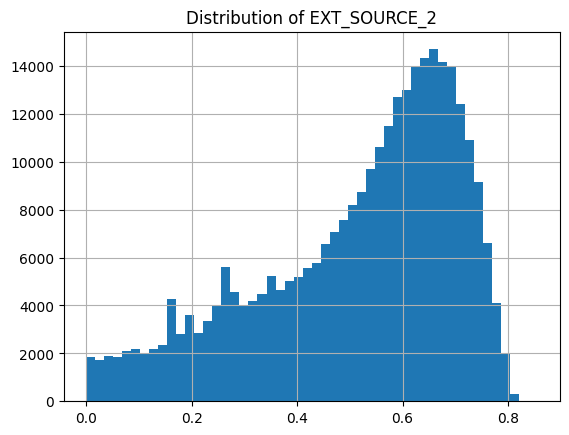

In [7]:
import matplotlib.pyplot as plt

df['EXT_SOURCE_2'].hist(bins=50)
plt.title('Distribution of EXT_SOURCE_2')
plt.show()


In [32]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median(), inplace=True)

In [8]:
df.shape

(305548, 31)

*here we want to know type of data to can edit on it and unique number for each them to easier treat with them*

 - then ,Make a copy of the original DataFrame ; to avoid modifying the original dataset.
 - then, Select all categorical columns `(object type)`.
 - Get the number of unique values for each categorical column.
 - Label encode columns with `≤ 5` unique values , to Identifies low-cardinality categorical features `and` Uses LabelEncoder to convert these into `numeric codes`.
 - One-hot encode columns with `6–10` unique values ,to Converts moderate-cardinality categorical features into `dummy/indicator` variables and `drop_first=True`  avoids multicollinearity.
   
-  Mean encode high-cardinality columns `(> 10 unique values)`
  to replace each category with the mean of the TARGET variable for that category `and` Useful for columns with many unique values.

- Drop original high-cardinality columns after encoding to Keep only the encoded versions.

       then, showing data to represent whether type of cols of objects coverted or not.

In [33]:
d_type=df.dtypes
n_unique=df.nunique()
pd.DataFrame({'data_type':d_type,'n_unique':n_unique}).T

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
data_type,int64,object,object,object,object,int64,float64,float64,float64,float64,...,int64,int64,float64,int64,int64,object,int64,int64,object,float64
n_unique,2,2,3,2,2,15,2516,5585,13652,985,...,2,2,17,3,3,7,24,2,58,119620


In [10]:
from sklearn.preprocessing import LabelEncoder

In [34]:
df_encoded = df.copy()

object_cols = df_encoded.select_dtypes(include='object')
n_unique = object_cols.nunique()

In [12]:
label_cols = n_unique[n_unique <= 5].index
le = LabelEncoder()
df_encoded[label_cols] = df_encoded[label_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [13]:
onehot_cols = n_unique[(n_unique > 5) & (n_unique <= 10)].index
df_encoded = pd.get_dummies(df_encoded, columns=onehot_cols, drop_first=True)

In [14]:
target_cols = n_unique[n_unique > 10].index
for col in target_cols:
    df_encoded[col + '_ENC'] = df_encoded.groupby(col)['TARGET'].transform('mean')
df_encoded.drop(columns=target_cols, inplace=True)

In [35]:
pd.DataFrame({'data_type':df_encoded.dtypes,'n_unique':df_encoded.nunique()}).T

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
data_type,int64,object,object,object,object,int64,float64,float64,float64,float64,...,int64,int64,float64,int64,int64,object,int64,int64,object,float64
n_unique,2,2,3,2,2,15,2516,5585,13652,985,...,2,2,17,3,3,7,24,2,58,119620


In [16]:
df.select_dtypes(include='bool').dtypes

,0


In [17]:
pd.DataFrame({'data_type':df_encoded.dtypes,'n_unique':df_encoded.nunique()}).T

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_ENC
data_type,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,...,bool,bool,bool,bool,bool,bool,bool,bool,bool,float64
n_unique,2,2,3,2,2,15,2516,5585,13652,985,...,2,2,2,2,2,2,2,2,2,58


**Firstly , Handling Class Imbalance with SMOTE :**

-  Splitting features and target
- Applying SMOTE , SMOTE `(Synthetic Minority Over-sampling Technique)` balances the dataset by creating synthetic examples of the minority class.
- This prints class counts before and after SMOTE —  checking  to ensure balance.
- Splitting Train/Test Data ,`80%` training, `20%` testing ,
Ensures we test on `unseen data`.
- We will train three different classifiers to compare: `Decision tree` ,`random forest` & `XGBoost`.
- Each model is trained, and predictions & probabilities are stored for evaluation.

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [19]:
X=df_encoded.drop('TARGET',axis=1)
y=df_encoded['TARGET']

In [20]:
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

In [21]:
print('Before smoting : ',y.value_counts())
print('After smoting : ',y_resampled.value_counts())

Before smoting :  TARGET
0    280845
1     24703
Name: count, dtype: int64
After smoting :  TARGET
1    280845
0    280845
Name: count, dtype: int64


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

In [24]:
#Decision tree
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
y_prop_dt=dt.predict_proba(X_test)

In [25]:
#Random forest
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
y_prop_rf=rf.predict_proba(X_test)

In [26]:
#XGBoost
xgb=XGBClassifier(use_label_encoder=False,
             eval_metric='logloss',
                  random_state=42
                  )

xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
y_prop_xgb=xgb.predict_proba(X_test)

**Evaluating the Models:**
 -  We create a helper function to evaluate metrics `evaluate_model` that contain on `name_model`,`acc`,`precision`,`recall`,`f1_score` ,`ROC`.
 - Then we call it for each model and build a comparison DataFrame.
 - This shows side-by-side performance of all three models:
  -  Decision tree : `.89`.
  - Random forest : `.9469`
  - XGBoost : `.9478`.

         then ,the best accuracy is `Random Forest`.



In [27]:
def evaluate_model(name, y_true, y_pred, y_prob):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob[:, 1])
    }

In [28]:
results = []
results.append(evaluate_model("Decision Tree", y_test, y_pred_dt,y_prop_dt))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf,y_prop_rf))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb,y_prop_xgb))

results_df = pd.DataFrame(results)
print("evaluation models :")
display(results_df)


evaluation models :


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Decision Tree,0.892948,0.882764,0.905669,0.894070,0.892978
1,Random Forest,0.949331,0.991526,0.906169,0.946928,0.977322
2,XGBoost,0.950471,0.997379,0.903082,0.947891,0.972866


**ROC Curve Visualization**

- We plot the ROC Curve for each model.
- Then we display them.
- ROC Curve shows:
 - True Positive Rate (sensitivity) vs. False Positive Rate

 - The more the curve pushes towards the top-left corner, the better.

- Comparing Models with Bar Chart:
 - This gives a clear bar chart:
   -  Easy to compare which model performs best across metrics:
       - note we focus on precision ,resulting the plot showed that acc.of `XGBoost ` > `Random Forest` ????  

In [29]:
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_prop_dt[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test,y_prop_rf[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test,y_prop_xgb[:, 1])

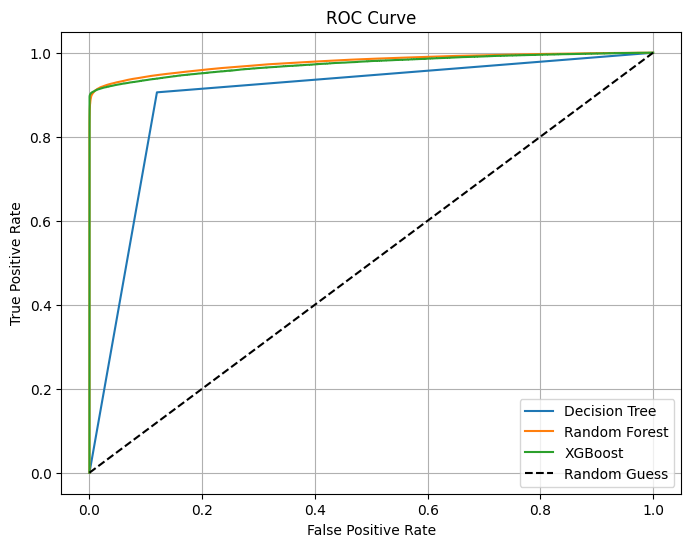

In [30]:
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

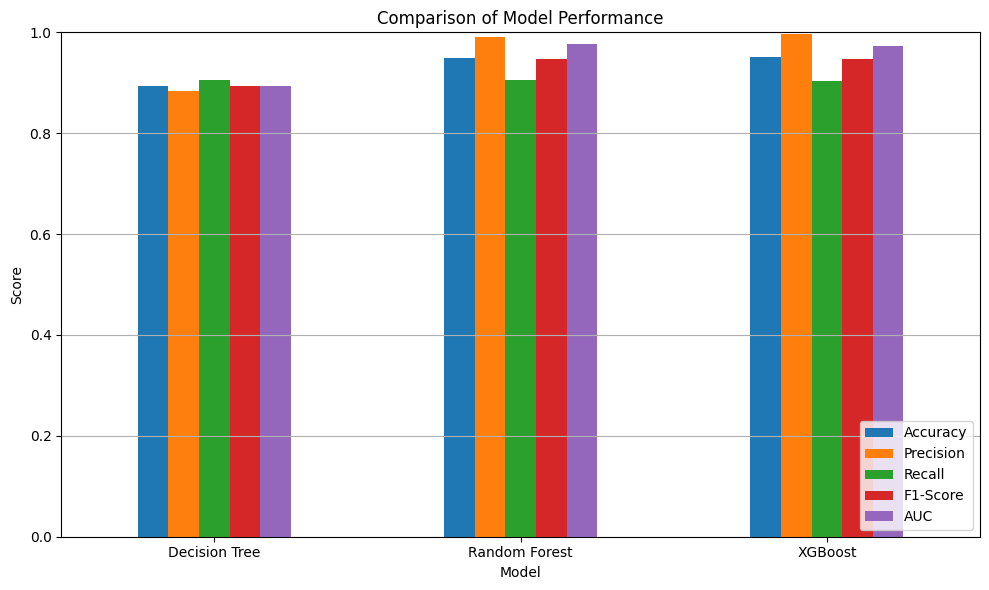

In [31]:
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]

results_df.set_index("Model")[metrics_to_plot].plot(kind='bar', figsize=(10,6))
plt.title("Comparison of Model Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()